In [129]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [130]:
data_direc = "/Users/kevin_smith/Documents/GitHub/Applied-Machine-Learning/hw4/data/"
train = pd.read_csv(data_direc + "Gisette/gisette_train.csv")
train_labels = pd.read_csv(data_direc + "Gisette/gisette_train_labels.csv")
test = pd.read_csv(data_direc + "Gisette/gisette_valid.csv")
test_labels = pd.read_csv(data_direc + "Gisette/gisette_valid_labels.csv")
train = np.delete(train, 5000, axis=1)
test = np.delete(test, 5000, axis=1)

Training Misclassification Error: 0.42000000000000004
Test Misclassification Error: 0.43999999999999995


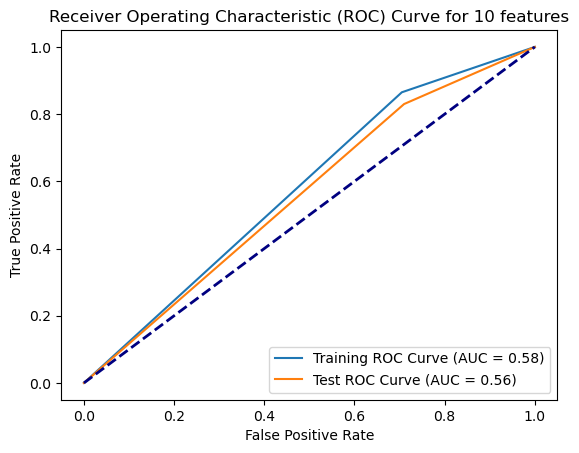

Training Misclassification Error: 0.3161666666666667
Test Misclassification Error: 0.31299999999999994


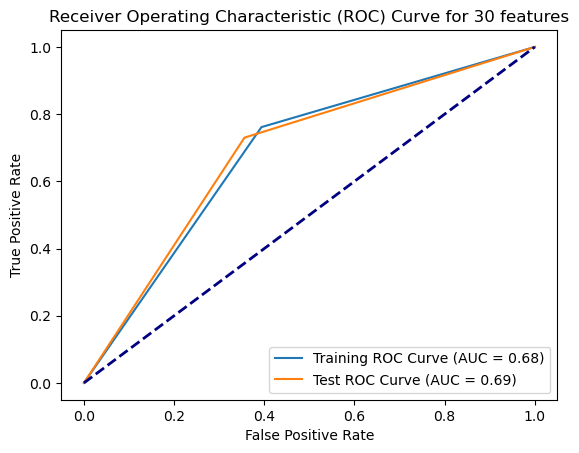

Training Misclassification Error: 0.21250000000000002
Test Misclassification Error: 0.20699999999999996


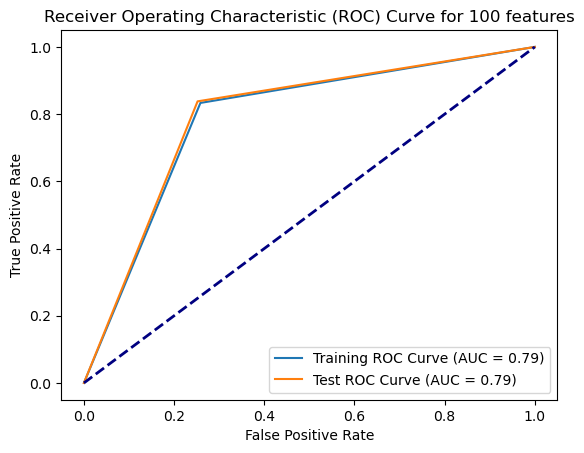

Training Misclassification Error: 0.07683333333333331
Test Misclassification Error: 0.08899999999999997


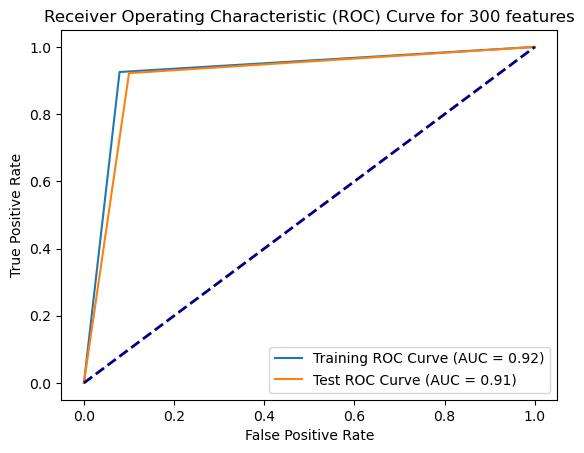

Training Misclassification Error: 0.053166666666666695
Test Misclassification Error: 0.06000000000000005


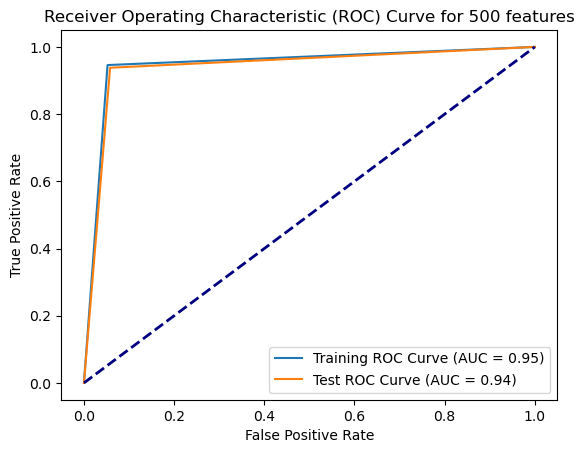

In [131]:

# Normalize variables
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

max_iter = 100
lda = .0002

weights = np.zeros((train.shape[1], 1))
predicted_labels = []

eta = 0

num_features = [10,30,100,300,500]
learning_rate = 1/6000

for i in range(len(num_features)):
    weights = np.zeros([num_features[i],1])
    train_temp = pd.DataFrame(train).loc[:, range(0, num_features[i])].to_numpy()
    for iter in range(max_iter):
        temp = weights + learning_rate*np.dot(train_temp.T,(train_labels.to_numpy() - 1/(1+np.exp(np.dot(-train_temp,weights)))))
        lda = np.mean(np.abs(temp))
        for j in range(len(temp)):
            if np.abs(temp[j]) <= lda:
                temp[j] = 0
        weights_temp = weights
        weights = temp

    train_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(train).loc[:, range(0, num_features[i])].to_numpy() @ weights))) > 0.5
    test_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(test).loc[:, range(0, num_features[i])].to_numpy() @ weights))) > 0.5

    # Calculate misclassification error
    train_error = 1 - accuracy_score(train_labels, train_labels_pred)
    test_error = 1 - accuracy_score(test_labels, test_labels_pred)

    print(f"Training Misclassification Error: {train_error}")
    print(f"Test Misclassification Error: {test_error}")

    false_pos_rate_train, true_pos_rate_train, _ = roc_curve(train_labels, train_labels_pred)
    roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

    false_pos_rate_test, true_pos_rate_test, _ = roc_curve(test_labels, test_labels_pred)
    roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

    # Plot ROC curve
    plt.figure()
    plt.plot(false_pos_rate_train, true_pos_rate_train,
        label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
    plt.plot(false_pos_rate_test, true_pos_rate_test,
        label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver Operating Characteristic (ROC) Curve for {num_features[i]} features")
    plt.legend(loc="lower right")
    plt.show()

In [132]:
data_direc
train = pd.read_csv(data_direc + "dexter/dexter_train.csv", header = None)
train_labels = pd.read_csv(data_direc + "dexter/dexter_train_labels.csv", header = None)
test = pd.read_csv(data_direc + "dexter/dexter_valid.csv", header = None)
test_labels = pd.read_csv(data_direc + "dexter/dexter_valid_labels.csv", header = None)

Training Misclassification Error: 0.5
Test Misclassification Error: 0.5066666666666666


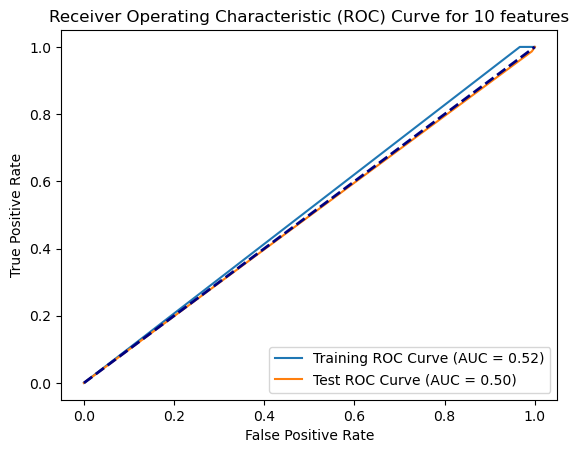

Training Misclassification Error: 0.5033333333333334
Test Misclassification Error: 0.5066666666666666


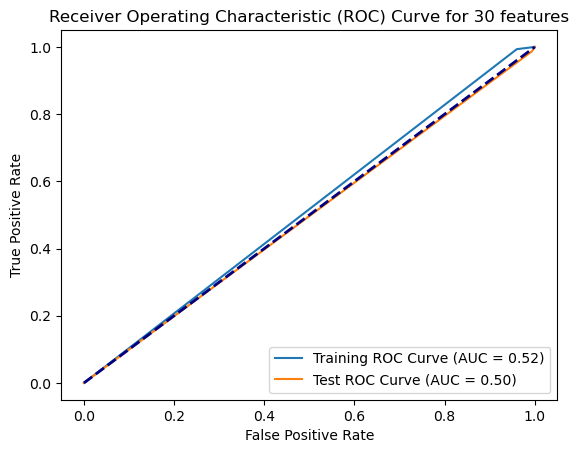

Training Misclassification Error: 0.5066666666666666
Test Misclassification Error: 0.5433333333333333


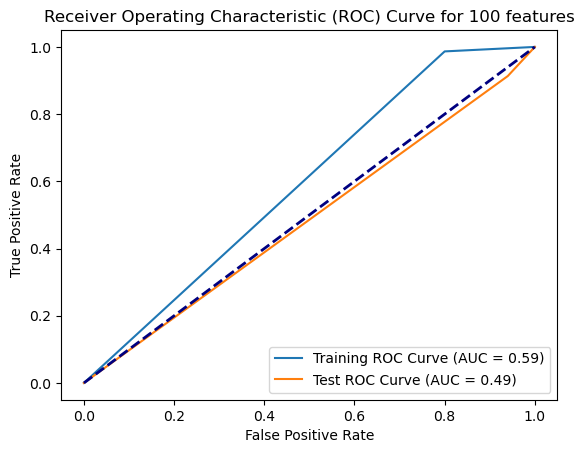

Training Misclassification Error: 0.6733333333333333
Test Misclassification Error: 0.7733333333333333


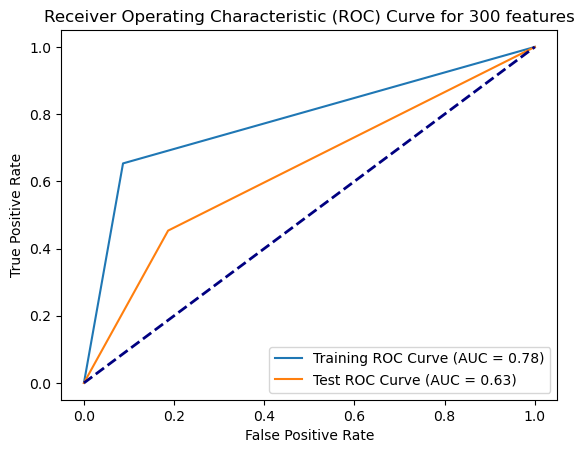

Training Misclassification Error: 0.6333333333333333
Test Misclassification Error: 0.7566666666666666


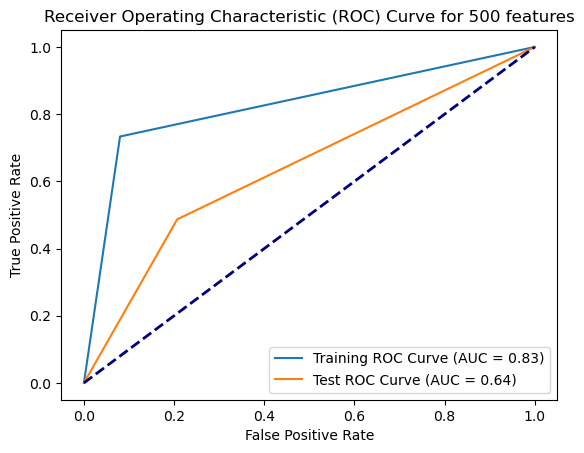

In [133]:

# Normalize variables
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

max_iter = 100
lda = .0002

weights = np.zeros((train.shape[1], 1))
predicted_labels = []

eta = 0

num_features = [10,30,100,300,500]
learning_rate = 1/(train.shape[1])

for i in range(len(num_features)):
    weights = np.zeros([num_features[i],1])
    train_temp = pd.DataFrame(train).loc[:, range(0, num_features[i])].to_numpy()
    for iter in range(max_iter):
        temp = weights + learning_rate*np.dot(train_temp.T,(train_labels.to_numpy() - 1/(1+np.exp(np.dot(-train_temp,weights)))))
        lda = np.mean(np.abs(temp))
        for j in range(len(temp)):
            if np.abs(temp[j]) <= lda:
                temp[j] = 0
        weights_temp = weights
        weights = temp

    train_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(train).loc[:, range(0, num_features[i])].to_numpy() @ weights))) > 0.5
    test_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(test).loc[:, range(0, num_features[i])].to_numpy() @ weights))) > 0.5

    # Calculate misclassification error
    train_error = 1 - accuracy_score(train_labels, train_labels_pred)
    test_error = 1 - accuracy_score(test_labels, test_labels_pred)

    print(f"Training Misclassification Error: {train_error}")
    print(f"Test Misclassification Error: {test_error}")

    false_pos_rate_train, true_pos_rate_train, _ = roc_curve(train_labels, train_labels_pred)
    roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

    false_pos_rate_test, true_pos_rate_test, _ = roc_curve(test_labels, test_labels_pred)
    roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

    # Plot ROC curve
    plt.figure()
    plt.plot(false_pos_rate_train, true_pos_rate_train,
        label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
    plt.plot(false_pos_rate_test, true_pos_rate_test,
        label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver Operating Characteristic (ROC) Curve for {num_features[i]} features")
    plt.legend(loc="lower right")
    plt.show()

In [134]:
mad_train = pd.read_fwf(data_direc + "madelon/madelon_train.data", header = None)
mad_labels = pd.read_fwf(data_direc + "madelon/madelon_train.labels", header = None)
mad_test = pd.read_fwf(data_direc + "madelon/madelon_valid.data", header = None)
mad_test_labels = pd.read_fwf(data_direc + "madelon/madelon_valid.labels", header = None)

Training Misclassification Error: 0.5
Test Misclassification Error: 0.5066666666666666


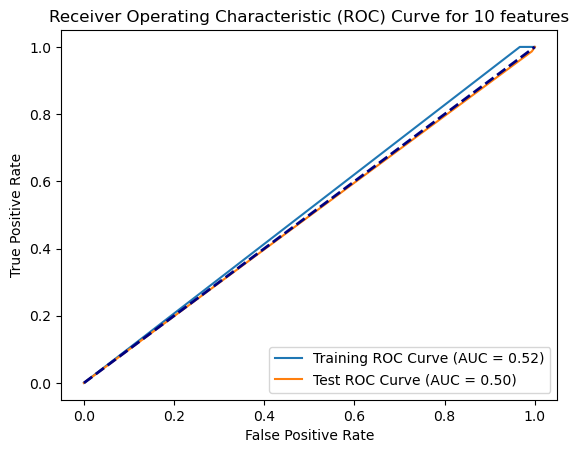

Training Misclassification Error: 0.5033333333333334
Test Misclassification Error: 0.5066666666666666


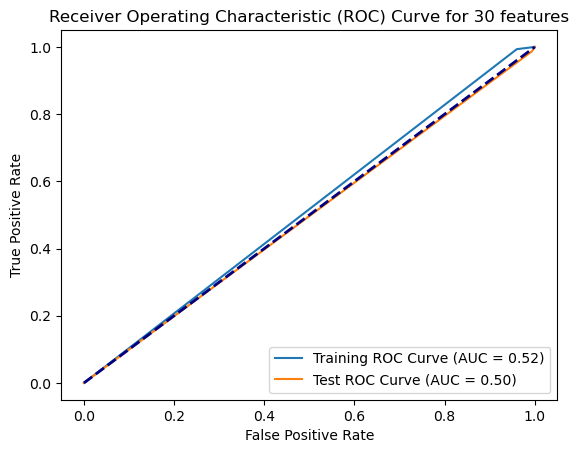

Training Misclassification Error: 0.5066666666666666
Test Misclassification Error: 0.5433333333333333


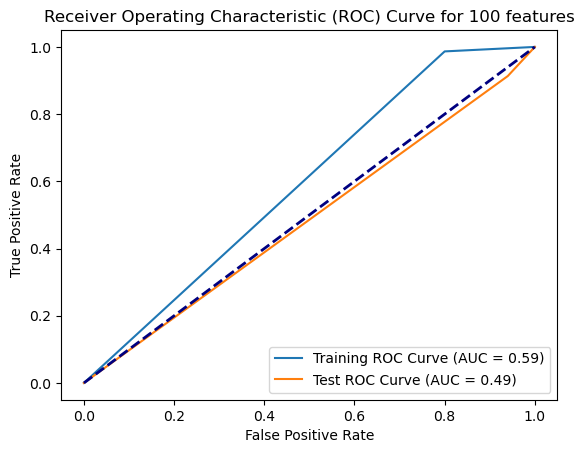

Training Misclassification Error: 0.6733333333333333
Test Misclassification Error: 0.7733333333333333


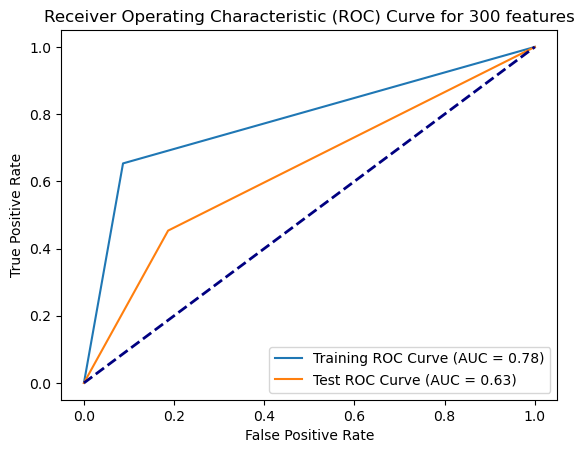

Training Misclassification Error: 0.6333333333333333
Test Misclassification Error: 0.7566666666666666


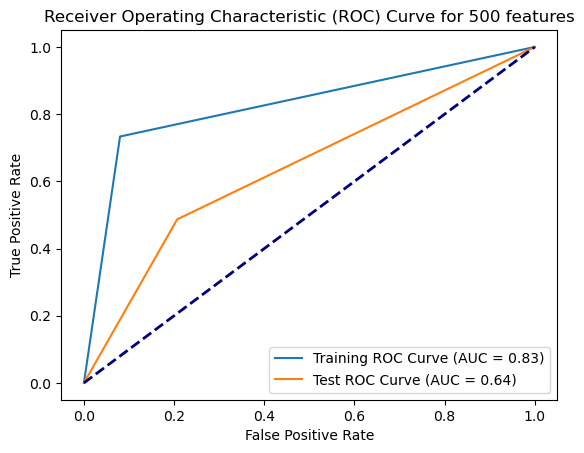

In [135]:

# Normalize variables
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

max_iter = 100
lda = .0002

weights = np.zeros((train.shape[1], 1))
predicted_labels = []

eta = 0

num_features = [10,30,100,300,500]
learning_rate = 1/(train.shape[1])

for i in range(len(num_features)):
    weights = np.zeros([num_features[i],1])
    train_temp = pd.DataFrame(train).loc[:, range(0, num_features[i])].to_numpy()
    for iter in range(max_iter):
        temp = weights + learning_rate*np.dot(train_temp.T,(train_labels.to_numpy() - 1/(1+np.exp(np.dot(-train_temp,weights)))))
        lda = np.mean(np.abs(temp))
        for j in range(len(temp)):
            if np.abs(temp[j]) <= lda:
                temp[j] = 0
        weights_temp = weights
        weights = temp

    train_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(train).loc[:, range(0, num_features[i])].to_numpy() @ weights))) > 0.5
    test_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(test).loc[:, range(0, num_features[i])].to_numpy() @ weights))) > 0.5

    # Calculate misclassification error
    train_error = 1 - accuracy_score(train_labels, train_labels_pred)
    test_error = 1 - accuracy_score(test_labels, test_labels_pred)

    print(f"Training Misclassification Error: {train_error}")
    print(f"Test Misclassification Error: {test_error}")

    false_pos_rate_train, true_pos_rate_train, _ = roc_curve(train_labels, train_labels_pred)
    roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

    false_pos_rate_test, true_pos_rate_test, _ = roc_curve(test_labels, test_labels_pred)
    roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

    # Plot ROC curve
    plt.figure()
    plt.plot(false_pos_rate_train, true_pos_rate_train,
        label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
    plt.plot(false_pos_rate_test, true_pos_rate_test,
        label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver Operating Characteristic (ROC) Curve for {num_features[i]} features")
    plt.legend(loc="lower right")
    plt.show()

In [136]:
(train.shape[1])

20000